In [1]:
import os
import shutil
import zipfile
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from tensorflow.keras.preprocessing import image
from sklearn.metrics import confusion_matrix, f1_score, roc_curve, precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix

In [3]:
# Cuenta el número de imágenes que hay por cada categoría

imag_1_hoja = 0
imag_2_hojas = 0
dir1 = "C:/Users/ferga/Documents/Python/hojas/1_mod"
dir2 = "C:/Users/ferga/Documents/Python/hojas/2_mod"
for path in os.listdir(dir1):
    if os.path.isfile(os.path.join(dir1, path)):
        imag_1_hoja += 1
for path in os.listdir(dir2):
    if os.path.isfile(os.path.join(dir2, path)):
        imag_2_hojas += 1
print('Imagenes de 1 hoja: '+ str(imag_1_hoja))
print('Imagenes de 2 hojas: '+ str(imag_2_hojas))
print('Total: ', imag_1_hoja+imag_2_hojas)


Imagenes de 1 hoja: 473
Imagenes de 2 hojas: 466
Total:  939


In [4]:
#Cuenta cuantas imágenes servirán para train, para validation y para test, en este caso se ha seguido el criterio 80%-10%-10% respectivamente.

n_imag_train_1 = round(imag_1_hoja*0.8)
n_imag_validation_1 = imag_1_hoja//10
n_imag_test_1 = imag_1_hoja-n_imag_train_1-n_imag_validation_1
print('1 hoja: Train=' + str(n_imag_train_1) + ' Validation=' + str(n_imag_validation_1) + ' Test=' + str(n_imag_test_1))
n_imag_train_2 = round(imag_2_hojas*0.8)
n_imag_validation_2 = imag_2_hojas//10
n_imag_test_2 = imag_2_hojas-n_imag_train_2-n_imag_validation_2
print('2 hojas: Train=' + str(n_imag_train_2) + ' Validation=' + str(n_imag_validation_2) + ' Test=' + str(n_imag_test_2))

1 hoja: Train=378 Validation=47 Test=48
2 hojas: Train=373 Validation=46 Test=47


In [5]:
#Asignamos cada ruta a variables que luego serán necesarias.

base_dir = "C:/Users/ferga/Documents/Python/hojas"

train_dir =      os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir =       os.path.join(base_dir, 'test')

## Directorio con las imagenes de train
# 1 hoja.
train_weed1_dir = os.path.join(train_dir, '1')
# 2 hojas.
train_weed2_dir = os.path.join(train_dir, '2')

## Directorio con las imagenes de validation
# 1 hoja
validation_weed1_dir = os.path.join(validation_dir, '1')
# 2 hojas
validation_weed2_dir = os.path.join(validation_dir, '2')


## Directorio con las imagenes de test
# 1 hoja
test_weed1_dir = os.path.join(test_dir,'1')
# 2 hojas
test_weed2_dir = os.path.join(test_dir,'2')


In [6]:
# Ordena cada foto en su respectiva carpeta de train, test o validation

#1
i=0
while len(os.listdir(train_weed1_dir ) ) < n_imag_train_1:
    if os.path.isfile('hojas/1/'+str(i)+'.png'):
        shutil.copy('hojas/1/'+ str(i) +'.png','hojas/train/1/'+ str(i)+'.png')
        i+=1
    else:
        i+=1
while len(os.listdir(validation_weed1_dir ) ) < n_imag_validation_1:
    if os.path.isfile('hojas/1/'+str(i)+'.png'):
        shutil.copy('hojas/1/'+ str(i) +'.png','hojas/validation/1/'+ str(i)+'.png')
        i+=1
    else:
        i+=1
while len(os.listdir(test_weed1_dir ) ) < n_imag_test_1:
    if os.path.isfile('hojas/1/'+str(i)+'.png'):
        shutil.copy('hojas/1/'+ str(i) +'.png','hojas/test/1/'+ str(i)+'.png')
        i+=1
    else:
        i+=1
#2
i=0
while len(os.listdir(train_weed2_dir ) ) < n_imag_train_2:
    if os.path.isfile('hojas/2/'+str(i)+'.png'):
        shutil.copy('hojas/2/'+ str(i) +'.png','hojas/train/2/'+ str(i)+'.png')
        i+=1
    else:
        i+=1
while len(os.listdir(validation_weed2_dir ) ) < n_imag_validation_2:
    if os.path.isfile('hojas/2/'+str(i)+'.png'):
        shutil.copy('hojas/2/'+ str(i) +'.png','hojas/validation/2/'+ str(i)+'.png')
        i+=1
    else:
        i+=1
while len(os.listdir(test_weed2_dir ) ) < n_imag_test_2:
    if os.path.isfile('hojas/2/'+str(i)+'.png'):
        shutil.copy('hojas/2/'+ str(i) +'.png','hojas/test/2/'+ str(i)+'.png')
        i+=1
    else:
        i+=1


In [6]:
# Pequeña comprobación de que las fotos están bien ordenadas

#Train
train_weed1_fnames = os.listdir( train_weed1_dir )
print(train_weed1_fnames[:5])
train_weed2_fnames = os.listdir( train_weed2_dir )
print(train_weed2_fnames[:5])

#Validation

#Test

['0.png', '1.png', '10.png', '100.png', '102.png']
['1.png', '10.png', '102.png', '103.png', '105.png']


In [7]:
#Comprueba el numero de fotos que hay en cada directorio para verificar que se ha realizado el reparto correctamente

print('total training weed1 images :', len(os.listdir(train_weed1_dir ) ))
print('total training weed2 images :', len(os.listdir(train_weed2_dir ) ))

print('total validation weed1 images :', len(os.listdir( validation_weed1_dir ) ))
print('total validation weed2 images :', len(os.listdir( validation_weed2_dir ) ))

print('total test weed1 images :', len(os.listdir( test_weed1_dir ) ))
print('total test weed2 images :', len(os.listdir( test_weed2_dir ) ))

total training weed1 images : 494
total training weed2 images : 494
total validation weed1 images : 61
total validation weed2 images : 61
total test weed1 images : 62
total test weed2 images : 62


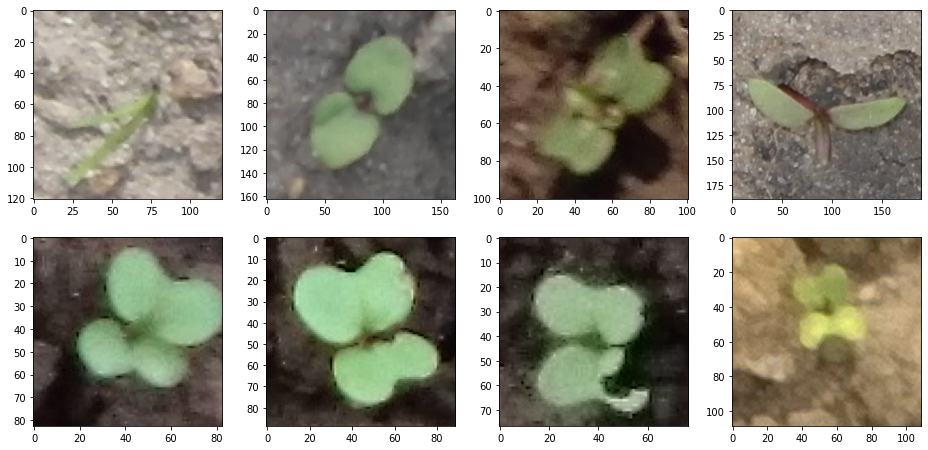

In [8]:
# Representa un ejemplo de las imágenes que se van a tomar para resolver el problema. En este caso se representarán las de dos hojas

# presentaremos images en una configuración de 4x4
nrows = 4
ncols = 4

pic_index = 0 # Índice para iterar sobre las imagenes

fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_weed_pix = [os.path.join(train_weed2_dir, fname) 
                for fname in train_weed2_fnames[ pic_index-8:pic_index] 
               ]

for i, img_path in enumerate(next_weed_pix):
  sp = plt.subplot(nrows, ncols, i + 1)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  
plt.show()

In [9]:
#Creación de la CNN

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3), activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3), activation='relu', ),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 256)       2

In [11]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [9]:
train_datagen = ImageDataGenerator(
      rescale=1.0/255.,
      rotation_range=60,
      horizontal_flip=True,
      fill_mode='nearest')
validation_datagen  = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

In [10]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='categorical',
                                                    target_size=(150, 150))     

validation_generator =  validation_datagen.flow_from_directory(validation_dir,
                                                         batch_size=20,
                                                         class_mode  = 'categorical',
                                                         target_size = (150, 150))


test_generator =  test_datagen.flow_from_directory(test_dir,
                                                         batch_size=20,
                                                         shuffle=False,
                                                         class_mode  = 'categorical',
                                                         target_size = (150, 150))

Found 988 images belonging to 2 classes.
Found 122 images belonging to 2 classes.
Found 124 images belonging to 2 classes.


In [14]:
batch_size = 20
steps_per_epoch = train_generator.n // batch_size
validation_steps = validation_generator.n // batch_size

print (steps_per_epoch)
print (validation_steps)

49
6


In [15]:
history = model.fit(
    train_generator, 
    steps_per_epoch= steps_per_epoch,
    epochs=125,
    validation_data=validation_generator,
    validation_steps= validation_steps,
    verbose=1)

Epoch 1/125
49/49 [==============================] - 11s 172ms/step - loss: 0.6922 - accuracy: 0.5434 - val_loss: 0.6905 - val_accuracy: 0.6250
Epoch 2/125
49/49 [==============================] - 6s 115ms/step - loss: 0.6902 - accuracy: 0.5992 - val_loss: 0.6888 - val_accuracy: 0.6167
Epoch 3/125
49/49 [==============================] - 6s 118ms/step - loss: 0.6874 - accuracy: 0.6033 - val_loss: 0.6868 - val_accuracy: 0.5833
Epoch 4/125
49/49 [==============================] - 6s 122ms/step - loss: 0.6837 - accuracy: 0.6178 - val_loss: 0.6829 - val_accuracy: 0.6667
Epoch 5/125
49/49 [==============================] - 6s 120ms/step - loss: 0.6775 - accuracy: 0.6653 - val_loss: 0.6770 - val_accuracy: 0.6333
Epoch 6/125
49/49 [==============================] - 6s 123ms/step - loss: 0.6689 - accuracy: 0.6756 - val_loss: 0.6677 - val_accuracy: 0.6750
Epoch 7/125
49/49 [==============================] - 6s 123ms/step - loss: 0.6546 - accuracy: 0.6860 - val_loss: 0.6527 - val_accuracy: 0.641

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 432x288 with 0 Axes>

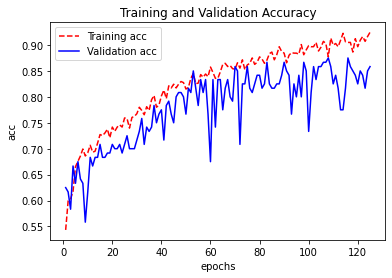

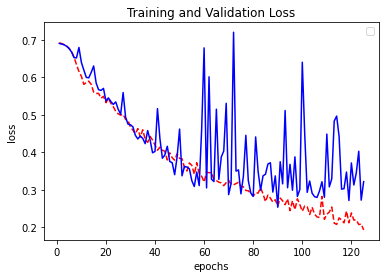

<Figure size 432x288 with 0 Axes>

In [16]:
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs    = range(1,len(acc)+1,1) # obtener número de epochs del eje X

plt.plot  ( epochs,     acc, 'r--', label='Training acc'  )
plt.plot  ( epochs, val_acc,  'b', label='Validation acc')
plt.title ('Training and Validation Accuracy')
plt.ylabel('acc')
plt.xlabel('epochs')

plt.legend()
plt.figure()


plt.plot  ( epochs,     loss, 'r--' )
plt.plot  ( epochs, val_loss ,  'b' )
plt.title ('Training and Validation Loss'   )
plt.ylabel('loss')
plt.xlabel('epochs')

plt.legend()
plt.figure()

In [12]:
test_lost, test_acc= model.evaluate(test_generator)
print ("Test Accuracy:", test_acc)

7/7 [==============================] - 2s 74ms/step - loss: 0.3839 - accuracy: 0.8468 0s - loss: 0.3839 - accuracy: 0.84
Test Accuracy: 0.8467742204666138


In [18]:
# Guardar el modelo
model.save('CH_V_2hojas.h5')

In [11]:
# Cargar modelo
model = tf.keras.models.load_model('CH_V_2hojas.h5')

[1. 0.]


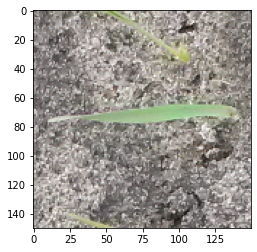

1 hoja


In [51]:
# predicting images

path='hojas/test/1/829.png'
img=image.load_img(path, target_size=(150, 150))
  
x=image.img_to_array(img)
x=np.expand_dims(x, axis=0)
images = np.vstack([x])
  
classes = model.predict(images, batch_size=10)
  
print(classes[0])
  
plt.imshow(img)  
plt.show()

if classes[0,0] == 1:
    print("1 hoja")
if classes[0,1] == 1:
    print("2 hojas")

In [13]:
# Predecir imagenes

predictions = model.predict(test_generator)

print(predictions)

y_pred = np.argmax(predictions, axis=1)
print(y_pred)
y_real = test_generator.classes
print(y_real)

[[9.25372601e-01 7.46273622e-02]
 [9.99870062e-01 1.29880384e-04]
 [9.99887824e-01 1.12112903e-04]
 [9.99232650e-01 7.67349440e-04]
 [9.76610005e-01 2.33899821e-02]
 [9.99584734e-01 4.15281131e-04]
 [9.99993563e-01 6.38708298e-06]
 [9.99987483e-01 1.24650742e-05]
 [9.99964476e-01 3.55586599e-05]
 [9.99981403e-01 1.85819372e-05]
 [9.99974608e-01 2.54176375e-05]
 [9.42810059e-01 5.71899638e-02]
 [9.99998450e-01 1.52673454e-06]
 [9.42203879e-01 5.77960797e-02]
 [9.27491903e-01 7.25080445e-02]
 [9.92852271e-01 7.14770099e-03]
 [6.68790400e-01 3.31209600e-01]
 [8.82999539e-01 1.17000476e-01]
 [9.99923348e-01 7.67046586e-05]
 [6.35545552e-01 3.64454478e-01]
 [9.99978781e-01 2.11672959e-05]
 [7.98979521e-01 2.01020494e-01]
 [9.96530712e-01 3.46928393e-03]
 [9.99594867e-01 4.05200495e-04]
 [8.82688105e-01 1.17311917e-01]
 [9.69033837e-01 3.09661403e-02]
 [9.99823511e-01 1.76507514e-04]
 [9.34391797e-01 6.56081662e-02]
 [9.93805528e-01 6.19452214e-03]
 [9.98943508e-01 1.05655100e-03]
 [5.049392

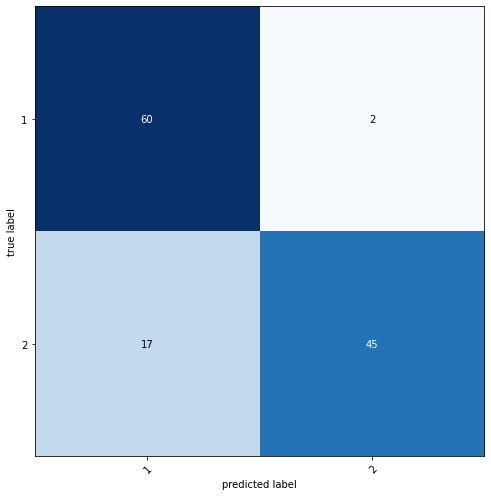

In [15]:
matc=confusion_matrix(y_real, y_pred)

plot_confusion_matrix(conf_mat=matc, figsize=(7,7), class_names = ['1','2'], show_normed=False)
plt.tight_layout()